In [15]:
def a_star(start, stop):
    open_set, closed_set, g, parents = {start}, set(), {start: 0}, {start: start}

    while open_set:
        n = min(open_set, key=lambda x: g[x] + heuristic(x))
        if n == stop or not Graph_nodes[n]: break

        for m, w in get_neighbors(n) or []:
            t_g = g[n] + w
            if m not in open_set and m not in closed_set: open_set.add(m); parents[m] = n; g[m] = t_g
            elif t_g < g[m]: g[m] = t_g; parents[m] = n; closed_set.discard(m); open_set.add(m)

        open_set.remove(n); closed_set.add(n)

    path = [n]
    while parents[n] != n: path.append(parents[n]); n = parents[n]
    print('Path found:', path[::-1])

def get_neighbors(v):
    return Graph_nodes.get(v, [])

def heuristic(n):
    h_dist = {'A': 10, 'B': 8, 'C': 5, 'D': 7, 'E': 3, 'F': 6, 'G': 5, 'H': 3, 'I': 1, 'J': 0}
    return h_dist.get(n, 0)

Graph_nodes = {'A': [('B', 6), ('F', 3)], 'B': [('C', 3), ('D', 2)], 'C': [('D', 1), ('E', 5)],
               'D': [('C', 1), ('E', 8)], 'E': [('I', 5), ('J', 5)], 'F': [('G', 1), ('H', 7)],
               'G': [('I', 3)], 'H': [('I', 2)], 'I': [('E', 5), ('J', 3)]}

a_star('A', 'J')


Path found: ['A', 'F', 'G', 'I', 'J']


In [77]:
import heapq

def ao_star(start, stop):
    open_set, g, parents = [(0, start)], {start: 0}, {start: start}

    while open_set:
        _, n = heapq.heappop(open_set)
        print(f"Visiting node: {n}")

        if n == stop or not Graph_nodes[n]:
            break

        for m, w in get_neighbors(n) or []:
            t_g = g[n] + w
            if m not in g or t_g < g[m]:
                parents[m] = n
                g[m] = t_g
                heapq.heappush(open_set, (t_g + heuristic(m) - heuristic(n), m))
                print(f"  Updating path to node {m}")

    if n == stop:
        path = [n]
        while parents[n] != n:
            path.append(parents[n])
            n = parents[n]
        path.reverse()
        print('Path found:', path)
    else:
        print('Path does not exist!')

def get_neighbors(v):
    return Graph_nodes.get(v, [])

def heuristic(n):
    h_dist = {'A': 10, 'B': 8, 'C': 5, 'D': 7, 'E': 3, 'F': 6, 'G': 5, 'H': 3, 'I': 1, 'J': 0}
    return h_dist.get(n, 0)

Graph_nodes = {'A': [('B', 6), ('F', 3)], 'B': [('C', 3), ('D', 2)], 'C': [('D', 1), ('E', 5)],
               'D': [('C', 1), ('E', 8)], 'E': [('I', 5), ('J', 5)], 'F': [('G', 1), ('H', 7)],
               'G': [('I', 3)], 'H': [('I', 2)], 'I': [('E', 5), ('J', 3)]}

ao_star('A', 'J')


Visiting node: A
  Updating path to node B
  Updating path to node F
Visiting node: F
  Updating path to node G
  Updating path to node H
Visiting node: G
  Updating path to node I
Visiting node: I
  Updating path to node E
  Updating path to node J
Visiting node: B
  Updating path to node C
  Updating path to node D
Visiting node: C
Visiting node: D
Visiting node: H
Visiting node: J
Path found: ['A', 'F', 'G', 'I', 'J']


In [64]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
concepts, target = np.array(data.iloc[:, :-1]), np.array(data.iloc[:, -1])

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in specific_h] for _ in specific_h]

    for i, h in enumerate(concepts):
        for x in range(len(specific_h)):
            if target[i] == "yes" and h[x] != specific_h[x]:
                specific_h[x], general_h[x][x] = '?', '?'
            if target[i] == "no" and h[x] != specific_h[x]:
                general_h[x][x] = specific_h[x] if general_h[x][x] == '?' else '?'
        print(f"Steps of Candidate Elimination Algorithm {i+1}")
        print(f"Specific_h {i+1}:\n{specific_h}")
        print(f"General_h {i+1}:\n{general_h}")
    return specific_h, [h for h in general_h if h != ['?', '?', '?', '?', '?', '?']]

s_final, g_final = learn(concepts, target)

print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")


Steps of Candidate Elimination Algorithm 1
Specific_h 1:
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
General_h 1:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps of Candidate Elimination Algorithm 2
Specific_h 2:
['sunny' 'warm' '?' 'strong' 'warm' 'same']
General_h 2:
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps of Candidate Elimination Algorithm 3
Specific_h 3:
['sunny' 'warm' '?' 'strong' 'warm' 'same']
General_h 3:
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
Steps of Candidate Elimination Algorithm 4
Specific_h 4:
['sunny

In [153]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
from pprint import pprint

def id3(df, target, attrs, default=None):
    counts = Counter(df[target])

    if len(counts) == 1 or df.empty or not attrs:
        return next(iter(counts) )if len(counts) == 1 else default

    gains = mutual_info_classif(df[attrs], df[target], discrete_features=True)
    best_attr = attrs[gains.argmax()]
    tree = {best_attr: {}}

    remaining_attrs = [a for a in attrs if a != best_attr]

    for val, subset in df.groupby(best_attr):
        tree[best_attr][val] = id3(subset, target, remaining_attrs, default)

    return tree

df = pd.read_csv("lab4.csv")
attrs = df.columns.tolist()
attrs.remove("PlayTennis")

for col in df.select_dtypes("object"):
    df[col], _ = df[col].factorize()

tree = id3(df, "PlayTennis", attrs)
print("The tree structure:")
pprint(tree)

The tree structure:
{'Outlook': {0: {'Humidity': {0: 0, 1: 1}}, 1: 1, 2: {'Wind': {0: 1, 1: 0}}}}


In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Data from CSV
data = pd.read_csv('lab4.csv')
print("The first 5 Values of data is :\n", data.head())

# Separate features (X) and target (y)
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())

y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())

# Convert categorical columns to numerical
label_encoders = [LabelEncoder() for _ in range(4)]
X_encoded = X.apply(lambda col: label_encoders.pop(0).fit_transform(col) if col.name in X.select_dtypes(include='object').columns else col)

# Convert target variable to numerical
le_play_tennis = LabelEncoder()
y = le_play_tennis.fit_transform(y)
print("\nNow the Train output is\n", X_encoded.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20)

# Train a Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(classifier.predict(X_test), y_test)
print("Accuracy is:", accuracy)

The first 5 Values of data is :
   PlayTennis   Outlook Temperature Humidity    Wind
0         No     Sunny         Hot     High    Weak
1         No     Sunny         Hot     High  Strong
2        Yes  Overcast         Hot     High    Weak
3        Yes      Rain        Mild     High    Weak
4        Yes      Rain        Cool   Normal    Weak

The First 5 values of the train data is
   PlayTennis   Outlook Temperature Humidity
0         No     Sunny         Hot     High
1         No     Sunny         Hot     High
2        Yes  Overcast         Hot     High
3        Yes      Rain        Mild     High
4        Yes      Rain        Cool   Normal

The First 5 values of train output is
 0      Weak
1    Strong
2      Weak
3      Weak
4      Weak
Name: Wind, dtype: object

Now the Train output is
    PlayTennis  Outlook  Temperature  Humidity
0           0        2            1         0
1           0        2            1         0
2           1        0            1         0
3           1

In [93]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return x * (1 - x)


X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float)
X = X / np.amax(X, axis=0)
y = np.array([[92], [86], [89]], dtype=float) / 100

input_neurons = 2
hidden_neurons = 3
output_neurons = 1


wh = np.random.uniform(size=(input_neurons, hidden_neurons))
bh = np.random.uniform(size=(1, hidden_neurons))
wout = np.random.uniform(size=(hidden_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

epoch = 500
eta = 0.2


for i in range(epoch):
    h_act = sigmoid(np.dot(X, wh) + bh)
    output = sigmoid(np.dot(h_act, wout) + bout)

    EO = y - output
    d_output = EO * sigmoid_grad(output)
    EH = d_output.dot(wout.T)
    d_hiddenlayer = EH * sigmoid_grad(h_act)

    wout += np.dot(h_act.T, d_output) * eta
    wh += np.dot(X.T, d_hiddenlayer) * eta

print("Input:\n", X)
print("Actual Output:\n", y)
print("Predicted Output:\n", output)


Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.89348276]
 [0.88091201]
 [0.89502212]]


In [99]:
import pandas as pd
from sklearn import *

data = pd.read_csv('lab4.csv')

X = pd.get_dummies(data.iloc[:, :-1])
Y = data.iloc[:, -1]

# Use LabelEncoder for the target variable Y
le = LabelEncoder()
Y = le.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

accuracy = accuracy_score(classifier.predict(X_test), Y_test)
print("Accuracy is:", accuracy)


Accuracy is: 0.6666666666666666


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


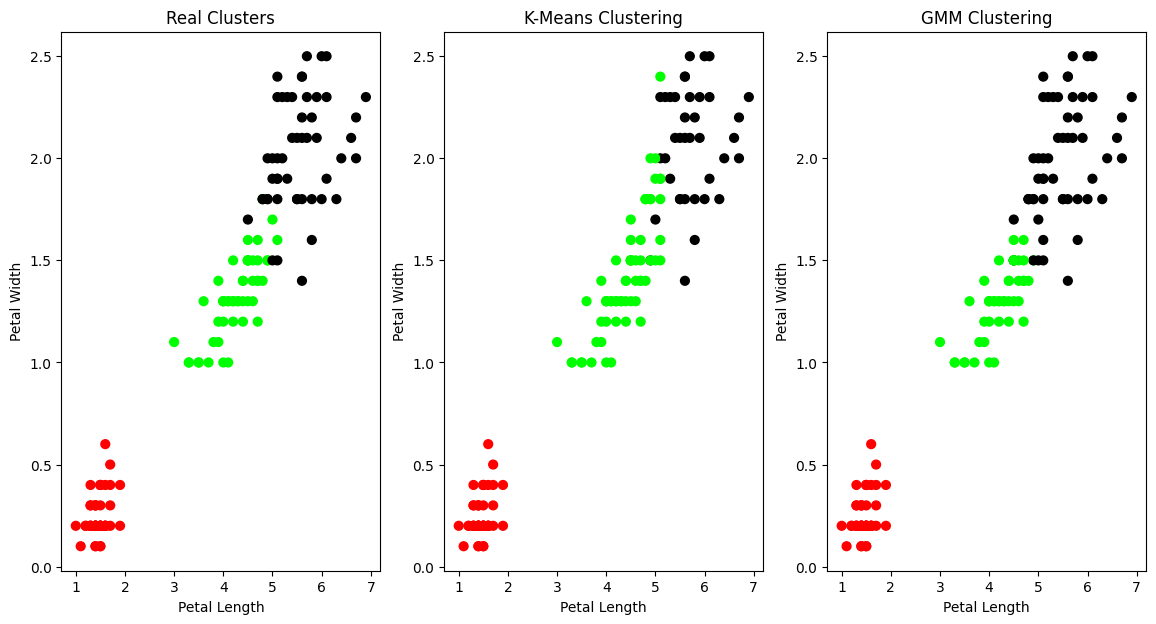

In [112]:
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris.target, columns=['Targets'])

kmeans_model = KMeans(n_clusters=3).fit(X)
gmm_model = GaussianMixture(n_components=3).fit(preprocessing.StandardScaler().fit_transform(X))

plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[kmeans_model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_model.predict(xs)], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()


In [116]:
from sklearn.datasets import load_iris
iris = load_iris()
print ("Feature Names: ", iris.feature_names, "Iris Data:", iris.data, "Target Names:", iris.target_names, "Target: ", iris.target)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split( iris.data, iris.target, test_size= 0.25)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train, y_train)
print("Predicted Data")
print(clf.predict (x_test))
prediction=clf.predict(x_test)
print("Test data :")
print(y_test)
diff=prediction-y_test
print("Result is ")
print(diff)
print('Total no of samples misclassified=',sum(abs(diff)))


Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] Iris Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.

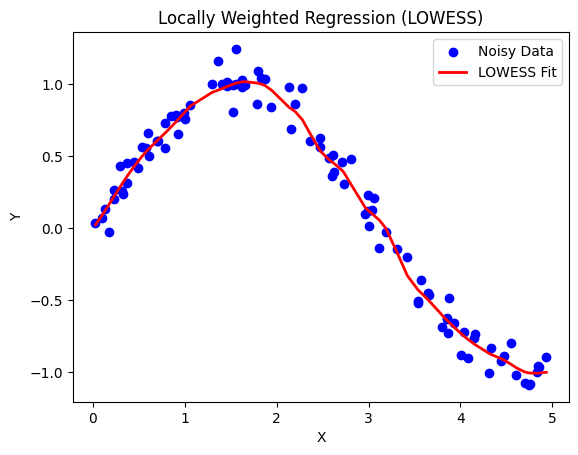

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(point, x, tau):
    return np.exp(-0.5 * ((x - point) / tau) ** 2)

def lowess(x, y, tau=0.25):
    ypred = np.zeros_like(y)

    for i in range(len(x)):
        weights = kernel(x[i], x, tau)
        weighted_x = weights * x
        weighted_y = weights * y
        beta = np.sum(weighted_x * weighted_y) / np.sum(weighted_x**2)
        ypred[i] = beta * x[i]

    return ypred

# Generate synthetic data
np.random.seed(42)
x = np.sort(5 * np.random.rand(100))
y = np.sin(x) + 0.1 * np.random.randn(100)

# Apply LOWESS
ypred = lowess(x, y, tau=0.2)

# Plotting
plt.scatter(x, y, label='Noisy Data', color='blue')
plt.plot(x, ypred, label='LOWESS Fit', color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression (LOWESS)')
plt.legend()
plt.show()
